In [49]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statistics as stats
import pylab 
from scipy.signal import find_peaks

In [50]:
pvt = pd.read_csv("PVT.csv")
pvt = pvt.rename(index = str, columns={"Joy":"Joy Lim", "Other Joy":"Joy Liu"})
survey_qs = pd.read_csv("Cognitive_Fatigue_Data.csv")
survey_qs.insert(1, "Gender", ['F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M','M',], True)
pulse = pd.read_csv("Pulse/ShreyaJainHeartbeat.csv", skiprows = 6, names = ['Time', 'mV'])


In [51]:
# Determining who is fatigued and who isn't based on Reaction Time

In [52]:
pvt.describe()

,Yariel,David,Vineet,Edward,Carol,Joy Lim,Sharvill,Esteban,Pratik,Adi,...,Mariela,Anna,Elaine,Harris,Vishal,Shuen,Varun,Joy Liu,Govind,Suat
count,43.000000,43.000000,44.000000,43.000000,44.000000,43.000000,42.000000,46.000000,44.000000,41.000000,...,39.000000,36.000000,40.000000,38.000000,39.000000,39.000000,43.000000,40.0000,42.000000,44.000000
mean,211305.813953,235034.418605,204089.340909,208359.465116,174654.613636,244750.930233,219025.619048,186274.978261,207329.636364,170616.243902,...,191046.512821,230374.861111,258813.200000,207254.736842,232919.589744,175527.923077,197082.093023,225146.1250,176010.119048,238906.227273
std,46544.057097,49123.615491,69888.420829,36784.329663,49023.469009,69849.958247,45587.329506,30302.832463,54921.768196,70358.933430,...,18057.411888,40543.548723,62290.422494,27936.098751,45375.814416,21426.823914,23808.241397,45054.6639,22826.632597,73750.738463
min,131447.000000,174536.000000,148615.000000,108443.000000,46944.000000,162805.000000,166599.000000,137429.000000,1.000000,1.000000,...,146216.000000,181448.000000,177127.000000,167014.000000,185014.000000,147590.000000,148424.000000,158420.0000,137907.000000,168526.000000
25%,185472.500000,197629.000000,167325.750000,188043.000000,156353.750000,207706.000000,190260.750000,166762.250000,181039.250000,154040.000000,...,180826.500000,203368.500000,214996.500000,188642.000000,204070.500000,160183.500000,183019.500000,198491.7500,157949.250000,194345.750000
50%,204858.000000,228048.000000,188276.500000,205800.000000,166059.500000,231938.000000,203100.000000,178419.000000,198142.500000,169635.000000,...,190111.000000,219879.500000,247472.000000,201431.000000,218073.000000,172624.000000,191787.000000,207582.5000,175525.500000,216631.000000
75%,219083.500000,248568.000000,201819.250000,215268.500000,177415.750000,257430.500000,235047.500000,199894.500000,228846.750000,191325.000000,...,201145.000000,242882.250000,292031.500000,218175.500000,241520.000000,182182.500000,213121.500000,236759.7500,187292.250000,262394.500000
max,424669.000000,421483.000000,488581.000000,350614.000000,403448.000000,586621.000000,366579.000000,298522.000000,372462.000000,338060.000000,...,239258.000000,385076.000000,403696.000000,280442.000000,426563.000000,249035.000000,261980.000000,386733.0000,231590.000000,613407.000000


In [53]:
survey_qs

,Name,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,M,4.00,8.0,0,4.0,7.0,1.00


In [54]:
pvt = pvt[pvt>100000]
pvt_mean = pvt.mean()
pvt_mean

Yariel      211305.813953
David       235034.418605
Vineet      204089.340909
Edward      208359.465116
Carol       177624.627907
Joy Lim     244750.930233
Sharvill    219025.619048
Esteban     186274.978261
Pratik      212151.232558
Adi         188077.243243
Alex        239858.044444
Odessa      210327.162791
Shreya      199415.023256
Mariela     191046.512821
Anna        230374.861111
Elaine      258813.200000
Harris      207254.736842
Vishal      232919.589744
Shuen       175527.923077
Varun       197082.093023
Joy Liu     225146.125000
Govind      176010.119048
Suat        238906.227273
dtype: float64

In [55]:
median_pvt = stats.median(pvt_mean)
#pvt_mean = pvt.mean()
#pvt_mean
median_pvt

210327.16279069768

In [56]:
fatigued = pvt_mean[pvt_mean>median_pvt]
fatigued

Yariel      211305.813953
David       235034.418605
Joy Lim     244750.930233
Sharvill    219025.619048
Pratik      212151.232558
Alex        239858.044444
Anna        230374.861111
Elaine      258813.200000
Vishal      232919.589744
Joy Liu     225146.125000
Suat        238906.227273
dtype: float64

In [57]:
not_fatigued = pvt_mean[pvt_mean<=median_pvt]
not_fatigued

Vineet     204089.340909
Edward     208359.465116
Carol      177624.627907
Esteban    186274.978261
Adi        188077.243243
Odessa     210327.162791
Shreya     199415.023256
Mariela    191046.512821
Harris     207254.736842
Shuen      175527.923077
Varun      197082.093023
Govind     176010.119048
dtype: float64

Text(0.5, 1.0, 'Histogram of Medlytics Class Reactions')

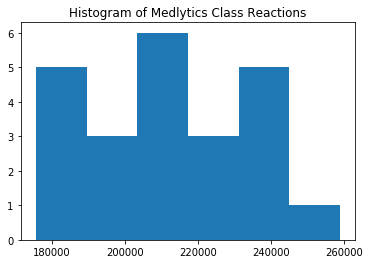

In [58]:
plt.hist(pvt_mean, bins=6) # bins = number of bars in the histogram
plt.title("Histogram of Medlytics Class Reactions")


In [59]:
label = pvt_mean > median_pvt # false = not fatigued, true = fatigued
label

Yariel       True
David        True
Vineet      False
Edward      False
Carol       False
Joy Lim      True
Sharvill     True
Esteban     False
Pratik       True
Adi         False
Alex         True
Odessa      False
Shreya      False
Mariela     False
Anna         True
Elaine       True
Harris      False
Vishal       True
Shuen       False
Varun       False
Joy Liu      True
Govind      False
Suat         True
dtype: bool

In [60]:
# identify columns by what type of data they hold -- first numeric columns
numeric_columns = list(["Income", "Alcohol", "Cholesterol", "Age"])

# categorical columns are everything else 
categorical_columns = list(set(mydat.columns) - set(numeric_columns))

# convert numeric columns from strings to numbers
mydat[numeric_columns] = mydat[numeric_columns].apply(pd.to_numeric)

NameError: name 'mydat' is not defined

In [61]:
pulse.head(10)


,Time,mV
0,Time,NaN
1,'0:0:0.0,348.0
2,'0:0:0.02,341.0
3,'0:0:0.04,331.0
4,'0:0:0.06,329.0
5,'0:0:0.08,327.0
6,'0:0:0.1,325.0
7,'0:0:0.12,327.0
8,'0:0:0.14,333.0
9,'0:0:0.16,334.0


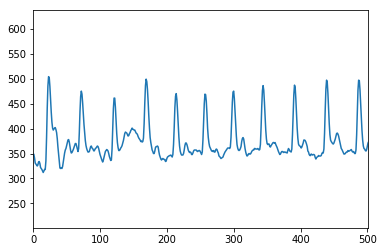

In [62]:
plt.plot(pulse['mV'])
pylab.xlim(0,501) # this is the first 10 seconds
plt.show()

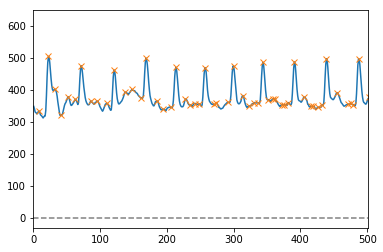

In [63]:
from scipy.misc import electrocardiogram
# x = electrocardiogram()[0:501]

peaks, _ = find_peaks(pulse['mV'])
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
plt.plot(np.zeros_like(pulse['mV']), "--", color="gray")
pylab.xlim(0,501)
plt.show()

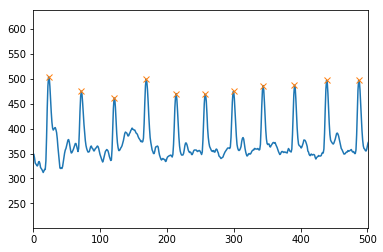

In [64]:
fs = 50
peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
np.diff(peaks)
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
pylab.xlim(0,501)
plt.show()

In [65]:
peaks[peaks<501].shape[0]*6

66

In [66]:
# gets number of beats per min by multiplying the number of heartbeats in first 10 seconds by 6
def get_heartrate(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks[peaks<501].shape[0]*6
        return result

In [67]:
names = ['AnnaHe','ElaineChu','MarielaNazarioCastro','HarrisBubalo','OdessaThompson','ShreyaJain','VarunNair','JoyLiu','VishalKumar','ShuenWu','GovindChada','SuatMartin','DavidDelValle','YerielMaldonado','JoyLim','EdwardYan','CarolZhang','VineetChinthakindi','PratikBharadwaj','SharvilTrifale','AlexYu','EstebanCintron','AadiDass-Vattam']


In [68]:
heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    heart_rates.iloc[0,i]=get_heartrate(names[i])

In [69]:
heart_rates

,AnnaHe,ElaineChu,MarielaNazarioCastro,HarrisBubalo,OdessaThompson,ShreyaJain,VarunNair,JoyLiu,VishalKumar,ShuenWu,...,YerielMaldonado,JoyLim,EdwardYan,CarolZhang,VineetChinthakindi,PratikBharadwaj,SharvilTrifale,AlexYu,EstebanCintron,AadiDass-Vattam
0,66,66,66,66,72,66,60,60,66,60,...,60,66,72,60,66,78,72,60,60,72


In [70]:
# gets number of beats per min by dividing the number of heartbeats in full 2 min by 2
def get_heartrate_avg(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks.shape[0]/2
        return result

In [71]:
get_heartrate_avg('OdessaThompson')

72.0

In [72]:
avg_heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    avg_heart_rates.iloc[0,i]=get_heartrate_avg(names[i])

In [73]:
avg_heart_rates

,AnnaHe,ElaineChu,MarielaNazarioCastro,HarrisBubalo,OdessaThompson,ShreyaJain,VarunNair,JoyLiu,VishalKumar,ShuenWu,...,YerielMaldonado,JoyLim,EdwardYan,CarolZhang,VineetChinthakindi,PratikBharadwaj,SharvilTrifale,AlexYu,EstebanCintron,AadiDass-Vattam
0,74.5,69,64,73.5,72,67,62.5,65,65.5,68,...,59,67,68.5,70,61,74.5,71.5,57,64.5,72


In [74]:
get_heartrate_avg('ShreyaJain')

67.0

In [75]:
# SPEECH ANALYSIS

In [76]:
# import libraries
import parselmouth as pm
import os
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# importing data
Shreya = pm.Sound("Speech/ShreyaJain.wav")

In [78]:
# getting intensity, pitch, formant
hInt = Shreya.to_intensity()
hPit = Shreya.to_pitch()
hForm = Shreya.to_formant_burg()

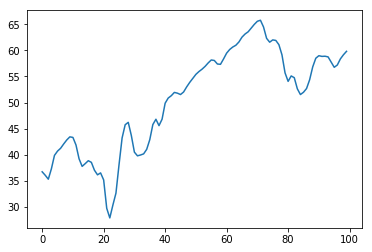

In [79]:
intensities = []
for val in hInt.t_grid():
    intensities.append(hInt.get_value(val))
plt.plot(intensities[:100])

In [80]:
formants = [[],[],[]]
for val in hForm.t_grid():
    formants[0].append(hForm.get_value_at_time(1,val))
    formants[1].append(hForm.get_value_at_time(2,val))
    formants[2].append(hForm.get_value_at_time(3,val))
    

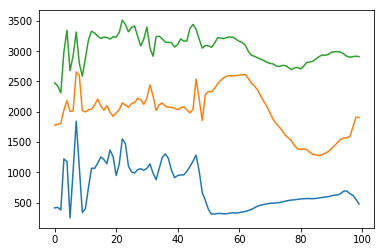

In [81]:
plt.plot(formants[0][0:100]) # 3 formants are 3 most significant components of voice
plt.plot(formants[1][0:100]) # this is like dimensionality reduction for sound
plt.plot(formants[2][0:100])

In [82]:
pitches = []
sum_pitches = 0
hPit.t_grid()
for val in hPit.t_grid():
    pitches.append(hPit.get_value_at_time(val))
#plt.plot(pitches[:100])
#hPit.get_value_at_time(hPit.t_grid[0])

In [83]:
pitches = np.array(pitches)
np.nanstd(pitches) # standard deviation, range

42.48340788323442

In [84]:
Harris = pm.Sound("Speech/AnnaHe.wav")
hInt = Harris.to_intensity()
hPit = Harris.to_pitch()
hForm = Harris.to_formant_burg()
pitches = []
sum_pitches = 0
hPit.t_grid()
for val in hPit.t_grid():
    pitches.append(hPit.get_value_at_time(val))
pitches = np.array(pitches)
np.nanstd(pitches) # standard deviation, range

33.27420727728753

In [85]:
names = ['AnnaHe','ElaineChu','MarielaNazarioCastro','HarrisBubalo','OdessaThompson','ShreyaJain','VarunNair','JoyLiu','VishalKumar','ShuenWu','GovindChada','SuatMartin','DavidDelValle','YerielMaldonado','JoyLim','EdwardYan','CarolZhang','VineetChinthakindi','PratikBharadwaj','SharvilTrifale','AlexYu','EstebanCintron','AadiDass-Vattam']
std_pitches = []

In [86]:
def get_pitch_std(name):
    speech = pm.Sound("Speech/"+ name + ".wav")
    hInt = speech.to_intensity()
    hPit = speech.to_pitch()
    hForm = speech.to_formant_burg()
    pitches = []
    hPit.t_grid()
    for val in hPit.t_grid():
        pitches.append(hPit.get_value_at_time(val))
    pitches = np.array(pitches)
    return np.nanstd(pitches)

In [87]:
for name in names:
    std_pitches.append(get_pitch_std(name))
survey_qs.insert(1,"Pitch STD",std_pitches)
survey_qs

,Name,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,33.274207,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,25.742984,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,43.118555,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,98.464906,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,46.735068,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,42.483408,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,74.529496,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,47.528966,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,60.445064,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,29.154047,M,4.00,8.0,0,4.0,7.0,1.00


In [88]:
all_pulses =[]
for i in range(len(names)):
    all_pulses.append(get_heartrate_avg(names[i]))
all_pulses

[74.5,
 69.0,
 64.0,
 73.5,
 72.0,
 67.0,
 62.5,
 65.0,
 65.5,
 68.0,
 71.0,
 70.0,
 75.5,
 59.0,
 67.0,
 68.5,
 70.0,
 61.0,
 74.5,
 71.5,
 57.0,
 64.5,
 72.0]

In [89]:
survey_qs.insert(1,"Pulse",all_pulses)

In [90]:
survey_qs

,Name,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,74.5,33.274207,F,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,69.0,25.742984,F,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,64.0,43.118555,F,4.00,4.0,0,5.0,1.0,0.00
3,Harris,73.5,98.464906,M,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,72.0,46.735068,F,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,67.0,42.483408,F,8.00,2.0,60,9.0,1.0,0.00
6,Varun,62.5,74.529496,M,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,65.0,47.528966,F,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,65.5,60.445064,M,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,68.0,29.154047,M,4.00,8.0,0,4.0,7.0,1.00


In [91]:
final_dat = survey_qs[['Name','Pulse','Pitch STD','Gender','sleep','fatigue scale','exercise(min)','eating scale','stress scale']]

In [92]:
final_dat

,Name,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale
0,Anna,74.5,33.274207,F,7.00,7.0,0,8.0,3.0
1,Elaine,69.0,25.742984,F,8.00,4.0,0,3.0,7.0
2,Mariela,64.0,43.118555,F,4.00,4.0,0,5.0,1.0
3,Harris,73.5,98.464906,M,6.00,6.0,15,6.0,3.0
4,Oddessa,72.0,46.735068,F,5.50,6.0,30,7.0,7.0
5,Shreya,67.0,42.483408,F,8.00,2.0,60,9.0,1.0
6,Varun,62.5,74.529496,M,6.00,3.0,0,9.0,2.0
7,Joy Liu,65.0,47.528966,F,6.50,5.0,10,10.0,8.0
8,Vishal,65.5,60.445064,M,6.00,3.0,0,8.0,3.0
9,Shuen,68.0,29.154047,M,4.00,8.0,0,4.0,7.0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [99]:
fulldata

NameError: name 'fulldata' is not defined

In [100]:
fulldata=fulldata>median_pvt

NameError: name 'fulldata' is not defined

In [101]:
fatigueness=fatigued.append(not_fatigued)

In [102]:
fatigueness=fatigueness>median_pvt

In [103]:
#final_dat = final_dat.drop('IsFatigued',axis=1)

In [104]:
label

Yariel       True
David        True
Vineet      False
Edward      False
Carol       False
Joy Lim      True
Sharvill     True
Esteban     False
Pratik       True
Adi         False
Alex         True
Odessa      False
Shreya      False
Mariela     False
Anna         True
Elaine       True
Harris      False
Vishal       True
Shuen       False
Varun       False
Joy Liu      True
Govind      False
Suat         True
dtype: bool

In [105]:
#final_dat.insert(1,'IsFatigued',fatigueness)

In [106]:
#final_dat = final_dat.insert(1, 'rt', pvt_mean)

In [107]:
is_fatigued = pd.Series(pvt_mean>median_pvt)

In [108]:
label

Yariel       True
David        True
Vineet      False
Edward      False
Carol       False
Joy Lim      True
Sharvill     True
Esteban     False
Pratik       True
Adi         False
Alex         True
Odessa      False
Shreya      False
Mariela     False
Anna         True
Elaine       True
Harris      False
Vishal       True
Shuen       False
Varun       False
Joy Liu      True
Govind      False
Suat         True
dtype: bool

In [109]:
final_dat.insert(1,'Label',[True,True,False,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,True,True,True,False,False])

In [110]:
#final_dat.loc[4,'Name']='Odessa'

In [111]:
final_dat = final_dat.drop(['LLAABBEELL', 'label'], axis=1)

KeyError: "['LLAABBEELL' 'label'] not found in axis"

In [112]:
final_dat

,Name,Label,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale
0,Anna,True,74.5,33.274207,F,7.00,7.0,0,8.0,3.0
1,Elaine,True,69.0,25.742984,F,8.00,4.0,0,3.0,7.0
2,Mariela,False,64.0,43.118555,F,4.00,4.0,0,5.0,1.0
3,Harris,False,73.5,98.464906,M,6.00,6.0,15,6.0,3.0
4,Oddessa,False,72.0,46.735068,F,5.50,6.0,30,7.0,7.0
5,Shreya,False,67.0,42.483408,F,8.00,2.0,60,9.0,1.0
6,Varun,False,62.5,74.529496,M,6.00,3.0,0,9.0,2.0
7,Joy Liu,True,65.0,47.528966,F,6.50,5.0,10,10.0,8.0
8,Vishal,True,65.5,60.445064,M,6.00,3.0,0,8.0,3.0
9,Shuen,False,68.0,29.154047,M,4.00,8.0,0,4.0,7.0


In [113]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

final_dat = final_dat.replace(to_replace = 'F',value=1)
final_dat = final_dat.replace(to_replace='M',value=0)
final_dat

,Name,Label,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale
0,Anna,True,74.5,33.274207,1,7.00,7.0,0,8.0,3.0
1,Elaine,True,69.0,25.742984,1,8.00,4.0,0,3.0,7.0
2,Mariela,False,64.0,43.118555,1,4.00,4.0,0,5.0,1.0
3,Harris,False,73.5,98.464906,0,6.00,6.0,15,6.0,3.0
4,Oddessa,False,72.0,46.735068,1,5.50,6.0,30,7.0,7.0
5,Shreya,False,67.0,42.483408,1,8.00,2.0,60,9.0,1.0
6,Varun,False,62.5,74.529496,0,6.00,3.0,0,9.0,2.0
7,Joy Liu,True,65.0,47.528966,1,6.50,5.0,10,10.0,8.0
8,Vishal,True,65.5,60.445064,0,6.00,3.0,0,8.0,3.0
9,Shuen,False,68.0,29.154047,0,4.00,8.0,0,4.0,7.0


In [115]:
final_dat

,Name,Label,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale
0,Anna,True,74.5,33.274207,1,7.00,7.0,0,8.0,3.0
1,Elaine,True,69.0,25.742984,1,8.00,4.0,0,3.0,7.0
2,Mariela,False,64.0,43.118555,1,4.00,4.0,0,5.0,1.0
3,Harris,False,73.5,98.464906,0,6.00,6.0,15,6.0,3.0
4,Oddessa,False,72.0,46.735068,1,5.50,6.0,30,7.0,7.0
5,Shreya,False,67.0,42.483408,1,8.00,2.0,60,9.0,1.0
6,Varun,False,62.5,74.529496,0,6.00,3.0,0,9.0,2.0
7,Joy Liu,True,65.0,47.528966,1,6.50,5.0,10,10.0,8.0
8,Vishal,True,65.5,60.445064,0,6.00,3.0,0,8.0,3.0
9,Shuen,False,68.0,29.154047,0,4.00,8.0,0,4.0,7.0


In [149]:
final_dat.corr()

,Label,Pulse,Pitch STD,Gender,sleep,fatigue scale,exercise(min),eating scale,stress scale
Label,1.000000,0.021471,0.044281,0.031782,0.185822,0.363358,0.057764,0.005079,0.122388
Pulse,0.021471,1.000000,-0.088888,0.092891,-0.182926,0.232554,-0.250292,0.383832,0.057517
Pitch STD,0.044281,-0.088888,1.000000,-0.401551,0.092551,0.226792,0.484230,0.129569,-0.440159
Gender,0.031782,0.092891,-0.401551,1.000000,0.188502,-0.237508,-0.263403,-0.044387,0.018337
sleep,0.185822,-0.182926,0.092551,0.188502,1.000000,-0.079677,0.274117,-0.095130,0.029879
fatigue scale,0.363358,0.232554,0.226792,-0.237508,-0.079677,1.000000,0.235113,0.030822,0.292199
exercise(min),0.057764,-0.250292,0.484230,-0.263403,0.274117,0.235113,1.000000,-0.034360,-0.038947
eating scale,0.005079,0.383832,0.129569,-0.044387,-0.095130,0.030822,-0.034360,1.000000,-0.095720
stress scale,0.122388,0.057517,-0.440159,0.018337,0.029879,0.292199,-0.038947,-0.095720,1.000000


In [259]:
# Write your code here
data_train, data_val = train_test_split(final_dat, test_size = 0.30, random_state = 0, stratify = final_dat['Label'])


y_train = data_train['Label']
y_val = data_val['Label']

# only features 
X_train = data_train[["Pulse","Pitch STD","eating scale"]]#,"fatigue scale"]]
X_val = data_val[["Pulse","Pitch STD","eating scale"]]# "fatigue scale"]]


X_train.head()

,Pulse,Pitch STD,eating scale
20,57.0,107.730207,5.0
15,68.5,39.453348,9.0
0,74.5,33.274207,8.0
3,73.5,98.464906,6.0
22,72.0,89.147483,10.0


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
results = cross_val_score(clf,X_train, y_train,cv=5)
results

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.75, 0.25, 0.25, 0.  , 0.5 ])

In [261]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()
results = clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1      True
2     False
18     True
13     True
5     False
Name: Label, dtype: bool [False False  True  True False]
AUC:  0.7916666666666666


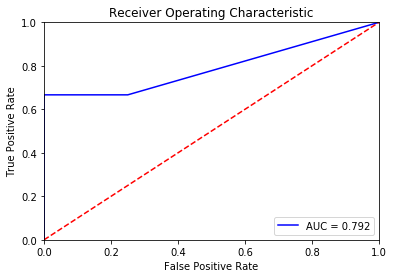

In [262]:
from sklearn.metrics import auc

# apply the model to test data
y_val_predict = clf.predict(X_val)
y_val_proba = clf.predict_proba(X_val)

print(y_val[:5],y_val_predict[:5]) 

from sklearn import metrics
from sklearn.metrics import confusion_matrix

#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_val,y_val_proba)

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()